In [27]:
from power import *
import matplotlib.pyplot as plt
import numpy as np

In [28]:
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net = builder.build_network()
solver = AC_PF(net)
solver.solve(verbose=True)

 
=== Iteration 0 === 
BARRA-1: P = 0.1447pu, Q = 0.4547pu, V = 1.0600pu, theta = 0.0000°
BARRA-2: P = 0.1224pu, Q = 0.3287pu, V = 1.0450pu, theta = 0.0000°
BARRA-3: P = -0.0201pu, Q = -0.1578pu, V = 1.0100pu, theta = 0.0000°
BARRA-4: P = -0.0957pu, Q = -0.1540pu, V = 1.0000pu, theta = 0.0000°
BARRA-5: P = -0.1381pu, Q = -0.5232pu, V = 1.0000pu, theta = 0.0000°
BARRA-6: P = 0.4928pu, Q = 0.9890pu, V = 1.0700pu, theta = 0.0000°
BARRA-7: P = 0.0000pu, Q = -0.6185pu, V = 1.0000pu, theta = 0.0000°
BARRA-8: P = 0.0000pu, Q = 0.5569pu, V = 1.0900pu, theta = 0.0000°
BARRA-9: P = 0.0000pu, Q = -0.2475pu, V = 1.0000pu, theta = 0.0000°
BARRA-10: P = -0.0000pu, Q = 0.0000pu, V = 1.0000pu, theta = 0.0000°
BARRA-11: P = -0.1369pu, Q = -0.2866pu, V = 1.0000pu, theta = 0.0000°
BARRA-12: P = -0.1068pu, Q = -0.2223pu, V = 1.0000pu, theta = 0.0000°
BARRA-13: P = -0.2169pu, Q = -0.4272pu, V = 1.0000pu, theta = 0.0000°
BARRA-14: P = 0.0000pu, Q = 0.0000pu, V = 1.0000pu, theta = 0.0000°
 
=== Iteration 1 =

In [29]:
V = solver.V
theta_ac = solver.theta

print('-----------------Resultados:-----------------')
for i in range(len(V)):
    print(f'Barra {i+1}:')
    print(f'V{i+1} = {V[i]:.3f} < {theta_ac[i]:.1f}°')

-----------------Resultados:-----------------
Barra 1:
V1 = 1.060 < 0.0°
Barra 2:
V2 = 1.045 < -5.0°
Barra 3:
V3 = 1.010 < -12.7°
Barra 4:
V4 = 1.019 < -10.3°
Barra 5:
V5 = 1.020 < -8.8°
Barra 6:
V6 = 1.070 < -14.2°
Barra 7:
V7 = 1.062 < -13.4°
Barra 8:
V8 = 1.090 < -13.4°
Barra 9:
V9 = 1.056 < -14.9°
Barra 10:
V10 = 1.051 < -15.1°
Barra 11:
V11 = 1.057 < -14.8°
Barra 12:
V12 = 1.055 < -15.1°
Barra 13:
V13 = 1.050 < -15.2°
Barra 14:
V14 = 1.036 < -16.0°


In [30]:
solver2 = DC_PF(net)
#print(solver2.B_red)
theta_dc = solver2.solve()
print(theta_dc)

[  0.          -5.10470769 -13.11134376 -10.79748905  -9.28246815
 -15.90518768 -14.60699606 -14.60699606 -16.48325718 -16.80970525
 -16.56129547 -16.99928149 -17.15557481 -18.07623835]


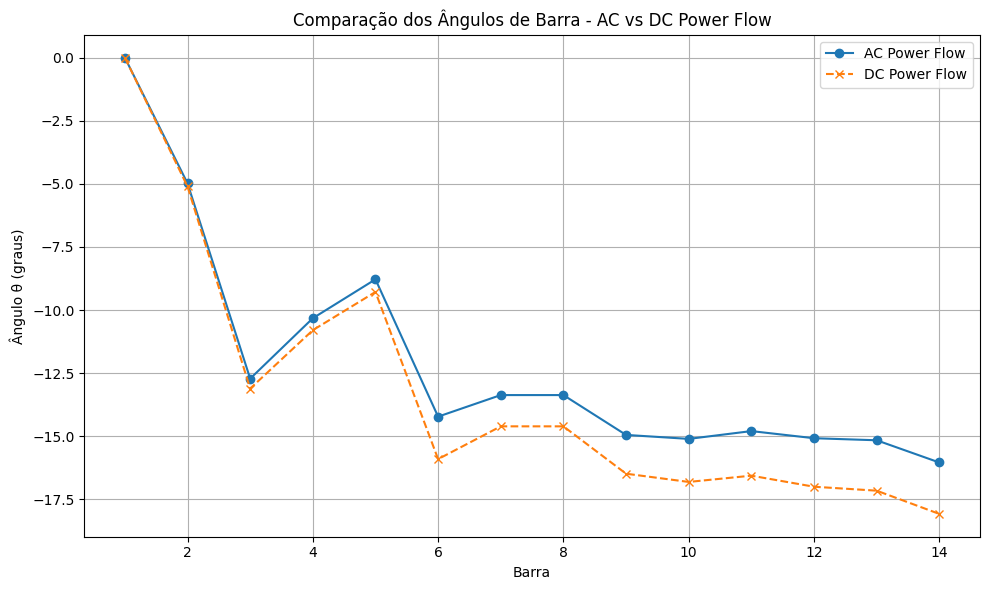

In [31]:
# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()